#MLOPS Certificate_Coursera_Andrew

**Introduction to Machine Learning in Production**

---
*Week1: Overview of the ML lifecycle and deployment*


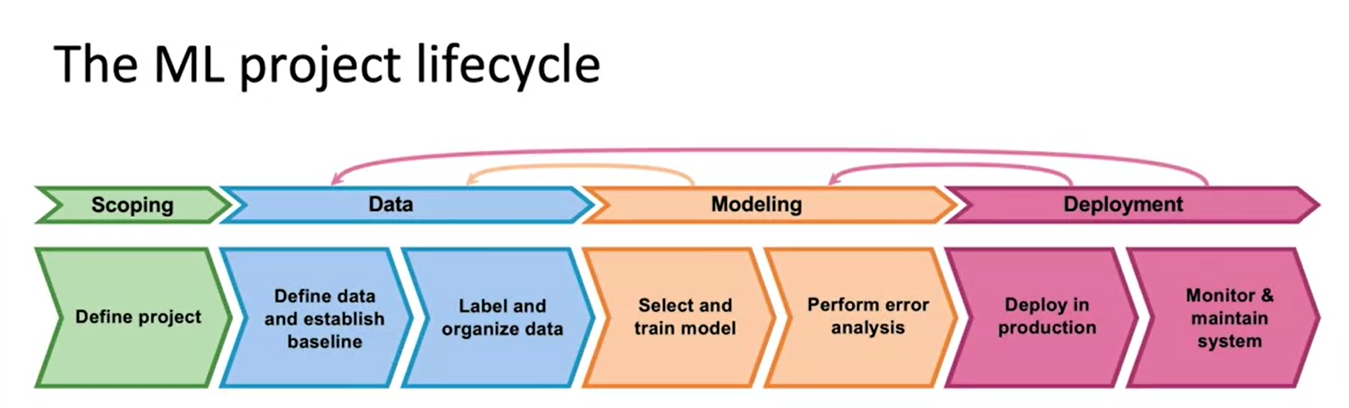

**1. Deployment**

Deployment is the last step of the machine learning lifecyle.
Deployment may be difficult/hard due to:

     

*   ML and statistics issues

    Data Drift: sudden change in the behavior(distribution of the data)

    Concept Drift: Mapping between x and y

*   software engine issues


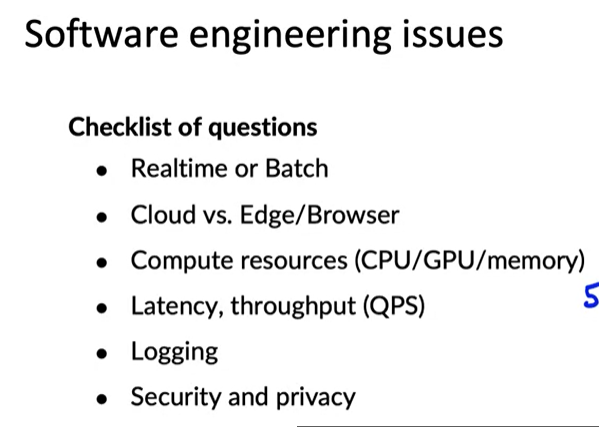



**Deployment patterns**
common deployment use cases:

1.New product/cpability

For eg. integrating a new speech recognition service

2.Automate/assist with manual tasks

3.Replace a previous system


**SHADOW MODE DEPLOYMENT**

means the ML system's output not used for any decisions during this phase, Only run in parallel. We go to the human judgement.

==> verifying the performance of the learning algorithm

**CANARY DEPLOYMENT**

Initially roll out to small fraction while deploying.

mintoring and ramping up gradually.

**BLUE GREEN DEPLOYMENT**

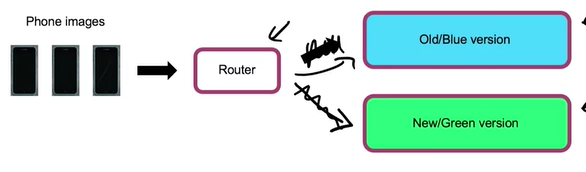


Degrees of automation:

* Human in the loop

or

* Automated




**2. Monitoring**

==> track if STH goes wrong

-Dashborads(over time)

metrics to track:
* Software metrics: Memory, Latency, compute, throughput, server load.

* input metrics : AVG input length, AVG input volume, Num missing values, AVG image brightness(in case lighting condition might change)

* Output Metrics : how time the algorithm return null for eg in speech recognition...


==> Set thresholds for alarms and notifications to see if there is a problem.(maintainance, retraining the model(automatic,manual)).

* How quickly the metrics change? is a problem dependent






----

#LAB 1 : Deploying a Deep Learning model Using fastAPI

----





**we will will deploy a computer vision model trained to detect common objects in pictures.**




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
from IPython.display import Image, display

In [17]:
##Data Understanding
Data_images="/content/drive/MyDrive/LOPS_DATA"

In [24]:
image={
    'apple.jpg',
    'clock.jpg',
    'oranges.jpg',
    'car.jpg'
}

for image in image:
  print(f'{image}')
  #display(Image(f"{Data_images}/{image}"))

oranges.jpg
car.jpg
apple.jpg
clock.jpg


Modeling : our model will be able to detect and draw a box arround the detected object.

let's create our function detect_and_draw_box

In [19]:
# Create a directory to store the result

import os
dir_name=f"{Data_images}/resulting_images_with_boxing"
if not os.path.exists(dir_name):
  os.mkdir(dir_name)



In [20]:
!pip install cvlib

In [21]:
# detect_and_draw_box function : input=(filename,model,confidence_level)
import cv2
import cvlib as cv ##cvlib is a simple, easy-to-use, high level, open-source Computer Vision library for Python.
from cvlib.object_detection import draw_bbox

In [27]:
def detect_and_draw_box(filename,model='yolov3-tiny',confidence=0.5):
  #why yolov3-tiny==>a lightweight version of yolo: for env that cannot store big models==> tradeoff: less accurate results than the full model byt works pretty well
  #confidence==> the threshold that the probab needs to surpass to report that a given object is detected on the supplied image.(generally=0.5)
  img_filepath=f'{Data_images}/{filename}'
  ##Read the image into a numpy array
  img=cv2.imread(img_filepath)
  #Object_detection using detect_common_object_function
  bbox, label, conf=cv.detect_common_objects(img, confidence=confidence, model=model)

  #Print current image's filename
  print(f"========================\nImage processed: {filename}\n")

  #Print detected objects with confidence level
  for l, c in zip(label, conf):
      print(f"Detected object: {l} with confidence level of {c}\n")

  # Create a new image that includes the bounding boxes
  output_image = draw_bbox(img, bbox, label, conf)

  #Save the image in the directory images_with_boxes
  cv2.imwrite(f'{Data_images}/resulting_images_with_boxing/{filename}', output_image)

  # Display the image with bounding boxes
  display(Image(f'{Data_images}/resulting_images_with_boxing/{filename}'))


Image processed: oranges.jpg

Detected object: orange with confidence level of 0.6185582876205444

Detected object: orange with confidence level of 0.5561721324920654



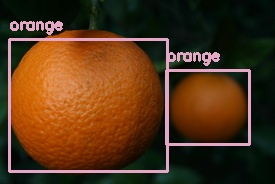

Image processed: car.jpg

Detected object: car with confidence level of 0.6325398683547974



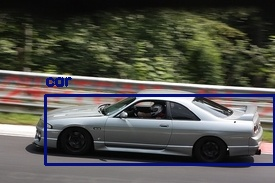

Image processed: apple.jpg

Detected object: apple with confidence level of 0.571723222732544



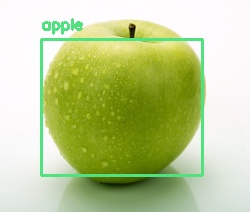

Image processed: clock.jpg

Detected object: clock with confidence level of 0.9683185815811157



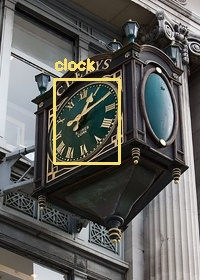

In [28]:

image={
    'apple.jpg',
    'clock.jpg',
    'oranges.jpg',
    'car.jpg'
}

for image in image:
  detect_and_draw_box(image)

Image processed: fruits.jpg

Detected object: apple with confidence level of 0.5818466544151306

Detected object: orange with confidence level of 0.5346412062644958

Detected object: orange with confidence level of 0.5150960087776184



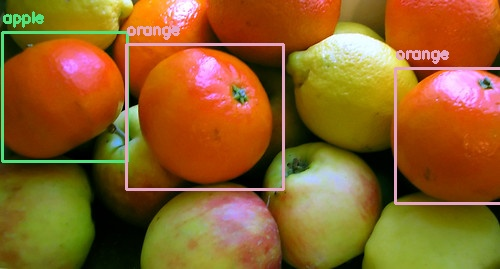

In [30]:
detect_and_draw_box('fruits.jpg')

Image processed: fruits.jpg

Detected object: apple with confidence level of 0.5818466544151306

Detected object: orange with confidence level of 0.5346412062644958

Detected object: orange with confidence level of 0.5150960087776184

Detected object: apple with confidence level of 0.3475964665412903

Detected object: orange with confidence level of 0.32876119017601013

Detected object: apple with confidence level of 0.312446653842926

Detected object: orange with confidence level of 0.27986255288124084

Detected object: orange with confidence level of 0.27499815821647644

Detected object: apple with confidence level of 0.27445000410079956

Detected object: orange with confidence level of 0.21419215202331543



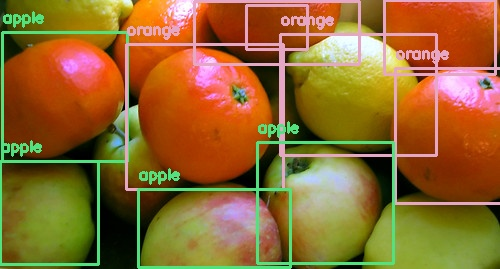

In [31]:
detect_and_draw_box("fruits.jpg", confidence=0.2)

#Deploying the model using fastAPI
- Placing your object detection model in a server

 the Machine Learning model lives in a server waiting for clients to submit prediction requests. The client should provide the required information that the model needs in order to make a prediction.

 Your API is coded using fastAPI but the serving is done using uvicorn, which is a really fast Asynchronous Server Gateway Interface (ASGI) implementation. Both technologies are closely interconnected and you don't need to understand the implementation details. Knowing that uvicorn handles the serving is sufficient for the purpose of this lab.

 * Why fastAPI?

With fastAPI you can create web servers to host your models very easily. Additionally, this platform is extremely fast and it has a built-in client that can be used to interact with the server.



In [32]:

#Directory to place images uploaded to the server
dir_name = "images_uploaded"
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

In [34]:
!pip install uvicorn fastapi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.4 MB/s eta 0:00:00


In [35]:
import io
import uvicorn
import numpy as np
import nest_asyncio
from enum import Enum
from fastapi import FastAPI, UploadFile, File, HTTPException
from fastapi.responses import StreamingResponse

In [37]:
!pip install python-multipart

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 1.5 MB/s eta 0:00:00


In [38]:
#Let's create an Instance of fastAPI that will be used to interact with our api
app= FastAPI(title='Object detection model deployed')

#Available models with Enum
class Model(str, Enum):
  yolov3tiny="yolov3-tiny"
  yolov3="yolov3"

# let's try out the get method in order to test our api
@app.get("/")
def home():
  return "YESS! OUR FIRST Fast API is WORKING! and FAST as expected"

# And here we go with our post where all the logic in handled
# All what it needs to work the image and the model :)

@app.post("/predict")
def prediction(model: Model, file:UploadFile=File(...)):
   # 1. VALIDATE INPUT FILE
    filename = file.filename
    fileExtension = filename.split(".")[-1] in ("jpg", "jpeg", "png")
    if not fileExtension:
        raise HTTPException(status_code=415, detail="Unsupported file provided.")
    # Read image as a stream of bytes
    image_stream = io.BytesIO(file.file.read())

    # Start the stream from the beginning (position zero)
    image_stream.seek(0)

    # Write the stream of bytes into a numpy array
    file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)

    # Decode the numpy array as an image
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
     # 3. RUN OBJECT DETECTION MODEL

    # Run object detection
    bbox, label, conf = cv.detect_common_objects(image, model=model)

    # Create image that includes bounding boxes and labels
    output_image = draw_bbox(image, bbox, label, conf)

    # Save it in a folder within the server
    cv2.imwrite(f'images_uploaded/{filename}', output_image)
      # 4. STREAM THE RESPONSE BACK TO THE CLIENT

    # Open the saved image for reading in binary mode
    file_image = open(f'images_uploaded/{filename}', mode="rb")

    # Return the image as a stream specifying media type
    return StreamingResponse(file_image, media_type="image/jpeg")

In [40]:
# Allows the server to be run in this interactive environment
nest_asyncio.apply()

# Host depends on the setup you selected (docker or virtual env)
host = "0.0.0.0"

# Spin up the server!
uvicorn.run(app, host=host, port=8000)

INFO:     Started server process [219]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [219]
